In [ ]:
import pandas as pd
filename = "/content/hotel_bookings.csv"
df = pd.read_csv(filename,sep=",")
df.head() 
df.shape

(119390, 32)

**#Ejercicio 1**

1. Limpiar la data en caso que corresponda
2. ¿existen duplicados?
3. Revisar que las fechas esten dentro de los años 2015 a 2017
4. Crear un histograma de la distribución de niños por familia
5. Crear una serie temporal de como han ido variando a traves de los años las reservas a hoteles del tipo 'city hotel'
6. crear un gráfico de torta para ver el % de tipos de hoteles
7. Generar una agrupación por compañia y mostrar el top 10 de reservas generadas por estas compañias en un gráfico de barras.
8. Ver la dispersion entre la cantidad de 'children' vs 'adult'
9. Generar una agrupación por día de fin de semana (sabado, domingo) de cuantos adultos, niños y bebes en promedio tienen una reserva y generar un gráfico de barras(subplot)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#generar copia de este vector de forma aleatoria y con eso haremos una matriz de confusion 
df["customer_type"].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

GENERAR NUEVA COLUMNA OCN VARIABLES CATEGORICAS **RANDOM CHOICE**

In [ ]:
df["nueva_columna"]=0

import random
lista = ["Transient", "Transient-Party", "Contract", "Group"]
for i in range(0, len(df["nueva_columna"])):
    x = random.choice(lista)
    df["nueva_columna"][i]=x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df["nueva_columna"].value_counts()

Group              29967
Transient          29850
Contract           29792
Transient-Party    29781
Name: nueva_columna, dtype: int64

In [ ]:
#df=df.drop(columns=["company"],axis=1)
df = df.loc[:, "hotel":"nueva_columna"].dropna(how = 'any')
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
a=["uno","uno","dato","uno","dato","uno"]

In [ ]:
b=["dato","uno","uno","uno","dato","uno"]


In [ ]:
from sklearn.metrics import confusion_matrix

y_true = a
y_pred=b

confusion_matrix(y_true, y_pred)

array([[1, 1],
       [1, 3]])

Dentro del rango


In [ ]:
df["arrival_date_year"].value_counts()

2015    145
2016     43
2017     29
Name: arrival_date_year, dtype: int64

crear un histograma de la distribución de niños por familia

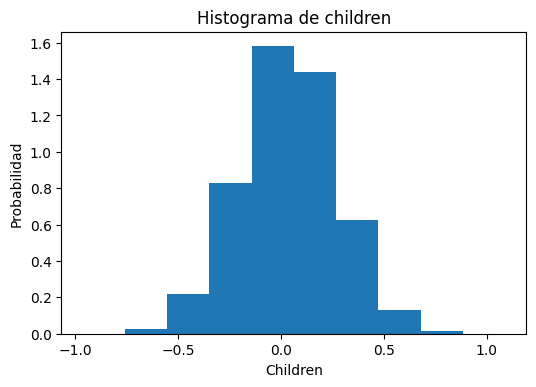

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import seed, randn

#seed(1) #semilla aleatoria fija, permite generar siempre los mismos números.

mu = 0.036866	 #media 
sigma = 0.232788 #desviación estándar 

#Muestro desde distribución normal (0,1) adaptada a media y dev.est. de nuestro caso
x = mu + sigma * randn(119390)


#datos histograma
#num_bins = 10 #casillas/divisiones del histograma
fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)

#Histograma - 1er argumento: datos del muestreo; 2do argumento: numero de divisiones, 3ero: normalizacion.
#density = True, indica que suma de alturas de las divisiones es 1.
ax1.hist(x, density=True)

ax1.set_xlabel("Children")
ax1.set_ylabel("Probabilidad")
ax1.set_title("Histograma de children")

plt.show()